In [1]:
# ! git clone https://github.com/WongKinYiu/yolov7.git

Cloning into 'yolov7'...


In [2]:
%cd yolov7

c:\Users\Abel\Documents\10 Academy\week-10\Automated-Storyboard-Synthesis-for-Digital-Advertising\notebooks\yolov7


In [10]:
 !pip install -r requirements.txt


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
! python detect.py --weights runs/train/exp9/weights/init.pt --conf 0.4 --img-size 1280 --source /_preview.png --project trial --name run


In [11]:
! python detect.py --source /as.png --weights runs/train/exp9/weights/init.pt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/as.png', update=False, view_img=False, weights=['runs/train/exp9/weights/init.pt'])


YOLOR  2024-2-16 torch 2.2.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1050, 4095.8125MB)

Traceback (most recent call last):
  File "detect.py", line 196, in <module>
    detect()
  File "detect.py", line 34, in detect
    model = attempt_load(weights, map_location=device)  # load FP32 model
  File "c:\Users\Abel\Documents\10 Academy\week-10\Automated-Storyboard-Synthesis-for-Digital-Advertising\notebooks\yolov7\models\experimental.py", line 253, in attempt_load
    model.append(ckpt['ema' if ckpt.get('ema') else 'model'].float().fuse().eval())  # FP32 model
  File "c:\Users\Abel\Documents\10 Academy\week-10\Automated-Storyboard-Synthesis-for-Digital-Advertising\.venv\lib\site-packages\torch\nn\modules\module.py", line 1688, in __getattr__
    raise AttributeError(f"'{type(self).__name__}' object has no attribute '{name}'")
AttributeError: 'Model' object has no attribute 'get'


In [3]:
import os
import subprocess
import csv

# Define the directory you want to start from
rootDir = '/Assets'

# Open the CSV file in append mode to avoid overwriting it
with open('object.csv', 'a', newline='') as csvfile:
    fieldnames = ['asset', 'object_detection']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write the header only if the file is empty
    if os.stat('object.csv').st_size == 0:
        writer.writeheader()

    for dirName, subdirList, fileList in os.walk(rootDir):
        for fname in fileList:
            if fname.endswith('_preview.png'):
                # Run the detect.py script
                command = f"python detect.py --source {os.path.join(dirName, fname)} --weights yolov7.pt"
                result = subprocess.run(command, shell=True, stdout=subprocess.PIPE)

                # Write the output to the CSV file
                writer.writerow({'asset': dirName, 'object_detection': result.stdout.decode('utf-8').strip()})


: 

In [3]:
import cv2
from typing import Tuple
import matplotlib.pyplot as plt

def locate_image_on_image(locate_image: str, on_image: str, prefix: str = '', visualize: bool = False, color: Tuple[int, int, int] = (0, 0, 255)):
    try:

        image = cv2.imread(on_image)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        template = cv2.imread(locate_image, 0)

        result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
        _, _, _, max_loc = cv2.minMaxLoc(result)

        height, width = template.shape[:2]

        top_left = max_loc
        bottom_right = (top_left[0] + width, top_left[1] + height)

        if visualize:
            cv2.rectangle(image, top_left, bottom_right, color, 1)
            plt.figure(figsize=(10, 10))
            plt.axis('off')
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(image)

        return {f'{prefix}top_left_pos': top_left, f'{prefix}bottom_right_pos': bottom_right}

    except cv2.error as err:
        print(err)

{'eng_top_left_pos': (96, 378), 'eng_bottom_right_pos': (510, 474)}

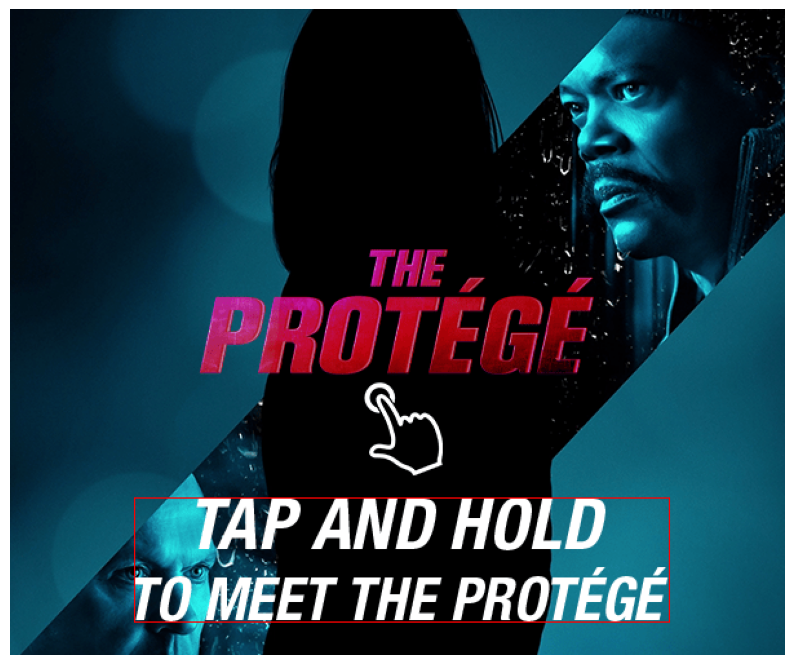

In [11]:
locate_image_on_image(
    '/Assets/3faf6a6e515ee4a3d08934b3e93a4a9e/engagemenet_instruction.png', '/Assets/3faf6a6e515ee4a3d08934b3e93a4a9e/_preview.png', prefix='eng_', visualize=True)


In [12]:
import os
import subprocess
import csv

# Define the directory you want to start from
rootDir = '/Assets'

# Open the CSV file in append mode to avoid overwriting it
with open('position.csv', 'a', newline='') as csvfile:
    fieldnames = ['asset', 'located_image']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write the header only if the file is empty
    if os.stat('position.csv').st_size == 0:
        writer.writeheader()

    for dirName, subdirList, fileList in os.walk(rootDir):
        # Check if there is an engagement_instruction.png and a _preview.png file in the folder
        if 'engagement_instruction.png' in fileList and '_preview.png' in fileList:
            # Run locate_image_on_image function with fixed filenames
            located_image_coords = locate_image_on_image(os.path.join(dirName, 'engagement_instruction.png'), os.path.join(dirName, '_preview.png'), prefix='eng_')

            # Write the output to the CSV file
            writer.writerow({'asset': dirName, 'located_image': located_image_coords})
        else:
            print(f"Error: There are not exactly two image files starting with 'eng_' in directory {dirName}")


Error: There are not exactly two image files starting with 'eng_' in directory /Assets
Error: There are not exactly two image files starting with 'eng_' in directory /Assets\002dbbd85ef3fe6a2e7d0754fb9f9a1a
Error: There are not exactly two image files starting with 'eng_' in directory /Assets\00508a6979fdd9c2e5f8c68bfefe5f71
Error: There are not exactly two image files starting with 'eng_' in directory /Assets\00dfe88c4d3fb60793765d314bf24b7c
Error: There are not exactly two image files starting with 'eng_' in directory /Assets\015efcdd8de3698ffc4dad6dabd6664a
Error: There are not exactly two image files starting with 'eng_' in directory /Assets\015f38df736f5a9498b18a1d12170187
Error: There are not exactly two image files starting with 'eng_' in directory /Assets\016534141ab870fdbf1b9c163955924d
Error: There are not exactly two image files starting with 'eng_' in directory /Assets\02335ed7fbc9fd8ec1505d30a7d385ba
Error: There are not exactly two image files starting with 'eng_' in dire

Extracting Text

In [14]:
!sudo apt install tesseract-ocr
!pip install pytesseract

'sudo' is not recognized as an internal or external command,
operable program or batch file.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pytesseract
import cv2
import numpy as np
from typing import List, Tuple

In [4]:
def convert_hex_to_rgb(hex_color: str, normalize: bool = True) -> List[str]:
    """Converts a HEX color to a RGB color

    Args:
        hex_color (str): HEX color code to convert
        normalize (bool, optional): Choice to normalize calculated rgb values . Defaults to True.

    Returns:
        List[str]: List of RGB values in order, normalized or not.
    """
    colors = hex_color[1:]

    # Convert HEX color values to RGB Values
    colors = [int(colors[0:2], base=16),  # RED
              int(colors[2:4], base=16),  # GREEN
              int(colors[4:6], base=16)]  # BLUE

    # Normalize RGB values
    if normalize:
        colors = [color / 255 for color in colors]

    return colors

def get_luminance(hex_color: str) -> float:
    """Calculates the luminance of a given HEX color

    Args:
        hex_color (str): HEX color code to calculate luminance for

    Returns:
        float: luminance value of color
    """
    colors = convert_hex_to_rgb(hex_color)

    luminance = colors[0] * 0.2126 + colors[1] * 0.7152 + colors[2] * 0.0722

    return luminance

def fix_image_background(image_path: str):
    identified_colors = identify_color_composition(image_path)
    text_color = identified_colors['c_code'].to_list()[0]
    text_color_rgb = identified_colors['rgb'].to_list()[0]
    luminance = get_luminance(hex_color=text_color)

    if luminance < 140:
        background_color = (255, 255, 255)
    else:
        background_color = (0, 0, 0)

    # Load image
    image = cv2.imread(image_path)

    # Make all perfectly green pixels white
    image[np.all(image != text_color_rgb, axis=-1)] = background_color

    return image

def extract_text(image_path, tesseract_cmd: str = '', fix_background: bool = False):
    # pytesseract.pytesseract.tesseract_cmd = tesseract_cmd
    try:
        if fix_background:
            text = pytesseract.image_to_string(
                fix_image_background(image_path))
        else:
            text = pytesseract.image_to_string(image_path)

        return text

    except pytesseract.TesseractNotFoundError:
        raise Exception(
            f'Failure: Tesseract is not installed or not available in the defined path {tesseract_cmd}')

In [5]:
import os
import subprocess
import csv

# Define the directory you want to start from
rootDir = '/Assets'

# Open the CSV file in append mode to avoid overwriting it
with open('text.csv', 'a', newline='') as csvfile:
    fieldnames = ['asset', 'engagement', 'preview']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write the header only if the file is empty
    if os.stat('text.csv').st_size == 0:
        writer.writeheader()

    for dirName, subdirList, fileList in os.walk(rootDir):
        # Check if there is an engagement_instruction.png and a _preview.png file in the folder
        if 'engagement_instruction.png' in fileList and '_preview.png' in fileList:
            # Run extract_text function with fixed filenames
            engagement_text = extract_text(os.path.join(dirName, 'engagement_instruction.png'))
            preview_text = extract_text(os.path.join(dirName, '_preview.png'))

            # Write the output to the CSV file
            writer.writerow({'asset': dirName, 'engagement': engagement_text, 'preview': preview_text})
        else:
            print(f"Error: There are not exactly two image files starting with 'eng_' in directory {dirName}")


Error: There are not exactly two image files starting with 'eng_' in directory /Assets
Error: There are not exactly two image files starting with 'eng_' in directory /Assets\002dbbd85ef3fe6a2e7d0754fb9f9a1a
Error: There are not exactly two image files starting with 'eng_' in directory /Assets\00508a6979fdd9c2e5f8c68bfefe5f71
Error: There are not exactly two image files starting with 'eng_' in directory /Assets\00dfe88c4d3fb60793765d314bf24b7c
Error: There are not exactly two image files starting with 'eng_' in directory /Assets\015efcdd8de3698ffc4dad6dabd6664a
Error: There are not exactly two image files starting with 'eng_' in directory /Assets\015f38df736f5a9498b18a1d12170187
Error: There are not exactly two image files starting with 'eng_' in directory /Assets\016534141ab870fdbf1b9c163955924d
Error: There are not exactly two image files starting with 'eng_' in directory /Assets\02335ed7fbc9fd8ec1505d30a7d385ba
Error: There are not exactly two image files starting with 'eng_' in dire

Exception: Failure: Tesseract is not installed or not available in the defined path 

In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [1]:
%cd yolov5

c:\Users\Abel\Documents\10 Academy\week-10\Automated-Storyboard-Synthesis-for-Digital-Advertising\notebooks\yolov5


In [6]:
!pip install -U -r requirements.txt

  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl (7.5 MB)
  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
  Using cached ultralytics-8.1.15-py3-none-any.whl (715 kB)
  Using cached pandas-2.0.3-cp38-cp38-win_amd64.whl (10.8 MB)
  Using cached setuptools-69.1.0-py3-none-any.whl (819 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Can't uninstall 'numpy'. No files were found to uninstall.
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Can't uninstall 'pandas'. No files were found to uninstall.


  ERROR: Can't roll back pandas; was not uninstalled
ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Abel\\Documents\\10 Academy\\week-10\\Automated-Storyboard-Synthesis-for-Digital-Advertising\\.venv\\Lib\\site-packages\\pandas\\io\\spss.py'
Check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!nvidia-smi

Mon Feb 19 01:06:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.99                 Driver Version: 536.99       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1050      WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   62C    P8              N/A / ERR! |    842MiB /  4096MiB |     15%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
!python detect.py --weights best.pt --conf 0.15 --iou 0.4 --source $test_dir --save-txt --save-conf --exist-ok

detect: weights=['best.pt'], source=$test_dir, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.15, iou_thres=0.4, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'C:\Users\Abel\Documents\10': No such file or directory
YOLOv5  2024-2-19 Python-3.8.17 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1050, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7072156 parameters, 0 gradients, 15.9 GFLOPs
Traceback (most recent call last):
  File "detect.py", line 311, in <module>
    main(opt)
  File "detect.py", line 306, in main
    run(**vars(opt))
  File "c:\Users\Abel\Documents\10 Academy\week-10\Automated-Storyboard-Synthesis-for-Digital-Advertising\.venv\lib\site-packages\tor